<a href="https://colab.research.google.com/github/Nivoter/ML/blob/main/12L_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Самостоятельное задание**

Произведите базовую подготовку данных;

In [2]:
!pip install -q numpy==1.19.0
!pip install -q matplotlib==3.1.0
!pip install -q seaborn==0.11.0
!pip install -q pandas==1.1.4

In [3]:
# Импорт необходимых модулей 
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Настройки для визуализации
# Если используется темная тема - лучше текст сделать белым


matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['text.color'] = 'black'
matplotlib.rcParams['font.size'] = 14


# Зафиксируем состояние случайных чисел
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [4]:
from sklearn.datasets import load_boston

boston_data = load_boston()
print(type(boston_data))

<class 'sklearn.utils.Bunch'>


In [9]:
feature_data = boston_data['data']
feature_names = boston_data['feature_names']
target_data = boston_data['target']
df = pd.DataFrame(feature_data, columns=boston_data['feature_names'])

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
df['PRICE'] = target_data

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [14]:
dup_mask = df.duplicated()
dup_mask.sum()

0

In [15]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

In [16]:
df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [17]:
df['CHAS'] = df['CHAS'].astype(int).astype(dtype='category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    float64 
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  PRICE    506 non-null    float64 
dtypes: category(1), float64(13)
memory usage: 52.1 KB


### **Расширенный анализ данных**

Оценка корреляции признаков

In [35]:
features = ['CRIM', 'ZN', 'INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','PRICE']

correlation_mtrx = df[features].corr()
correlation_mtrx

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
NOX,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
PTRATIO,0.289946,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787


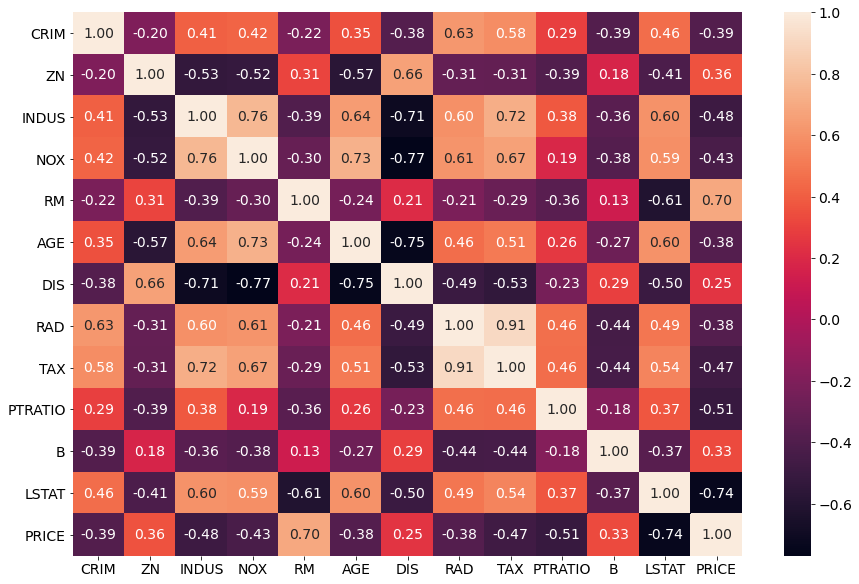

In [36]:
sns.heatmap(correlation_mtrx, annot=True, fmt='.2f')

Оценка распределения параметров

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


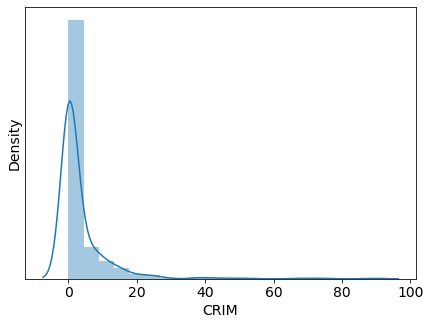

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


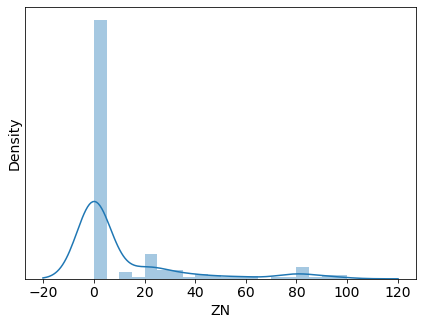

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


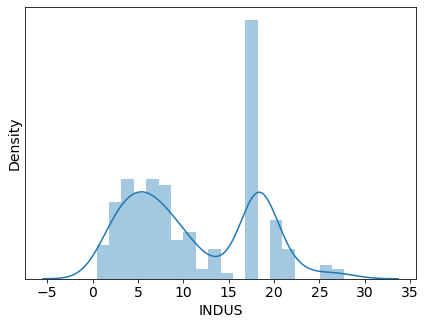

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


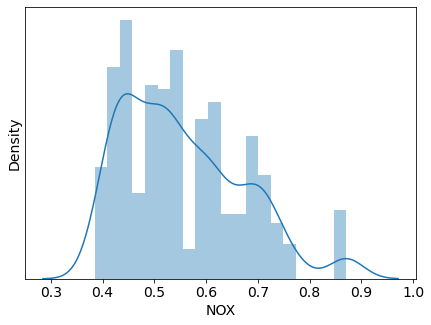

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


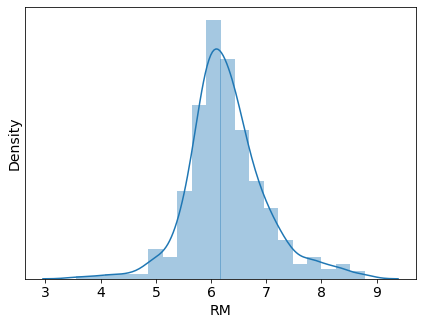

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


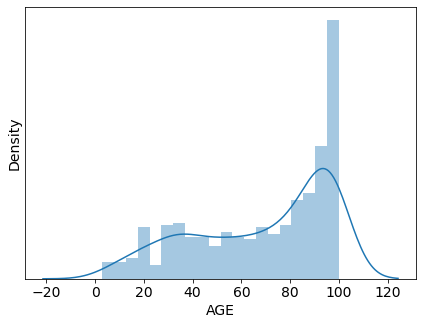

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


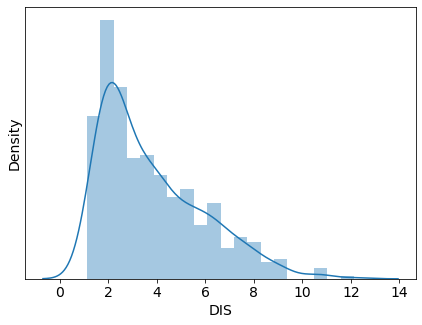

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


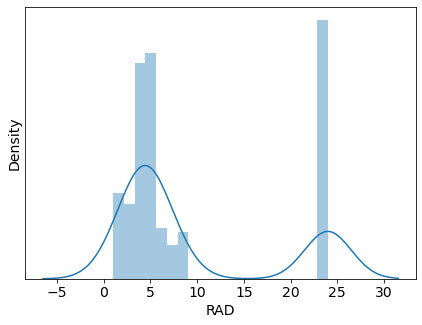

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


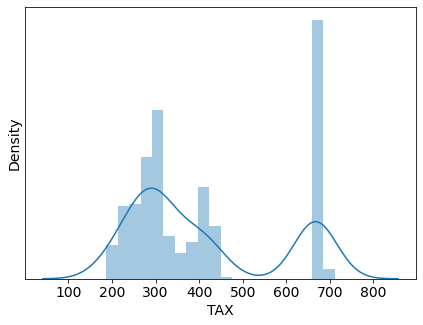

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


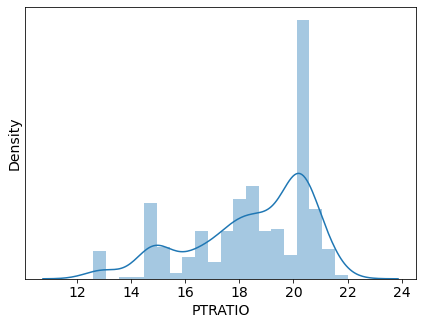

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


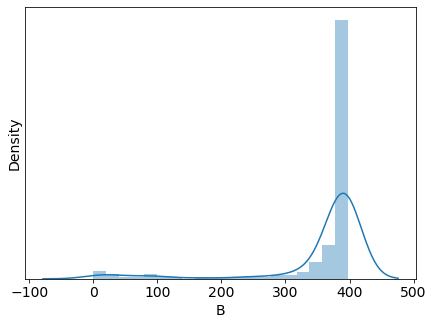

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


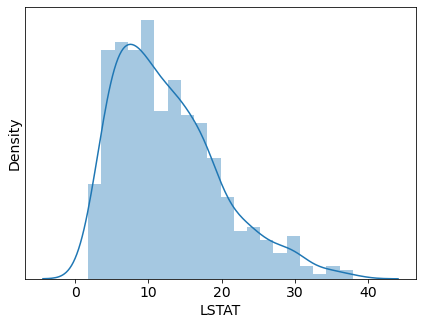

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


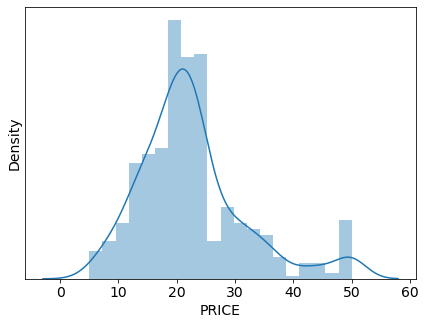

In [37]:
for feat in (features):
  plt.figure(figsize=[7, 5])
  sns.distplot(df[feat], bins=20)
  # Отключение меток на оси Y
  plt.yticks([])
  plt.show()

Оценка характера зависимости целевой переменной от каждого признака

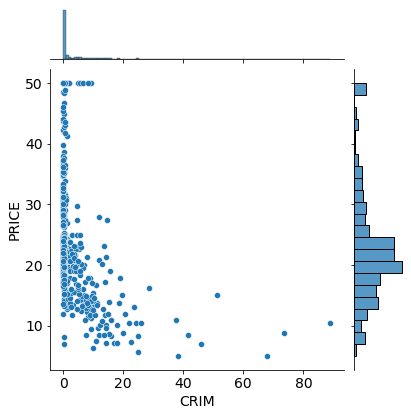

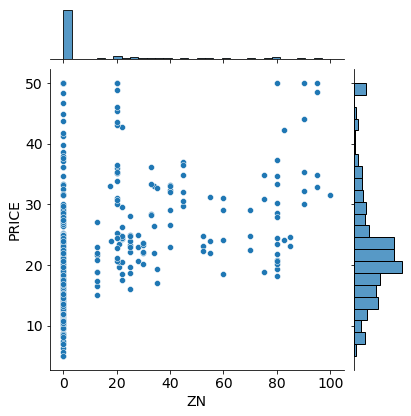

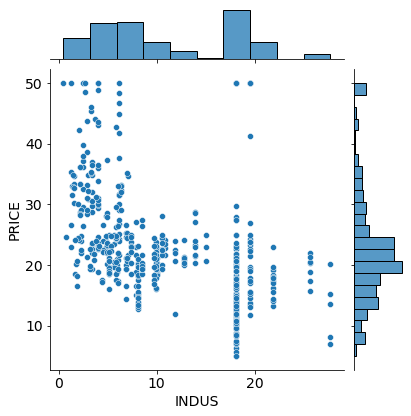

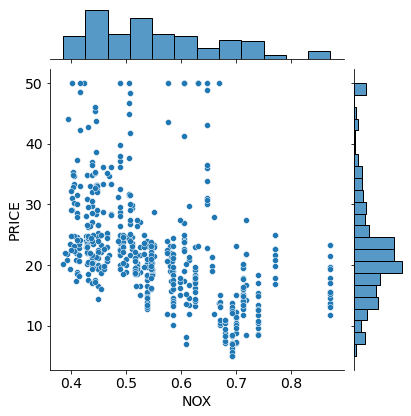

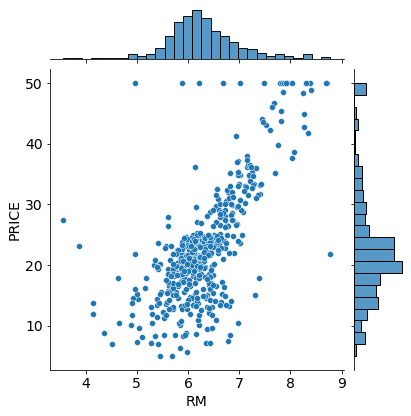

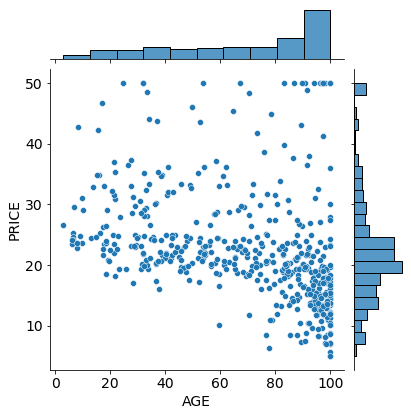

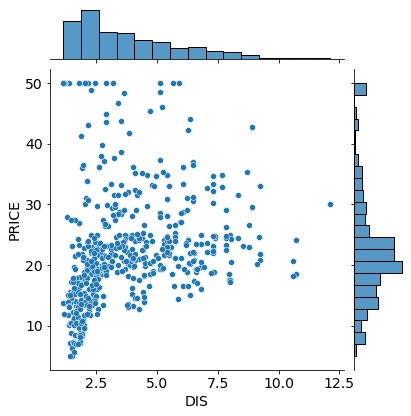

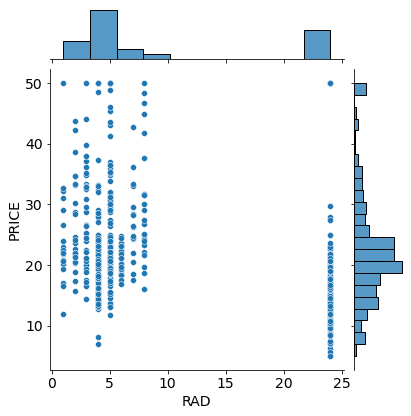

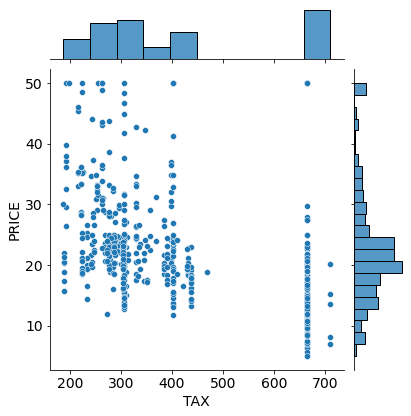

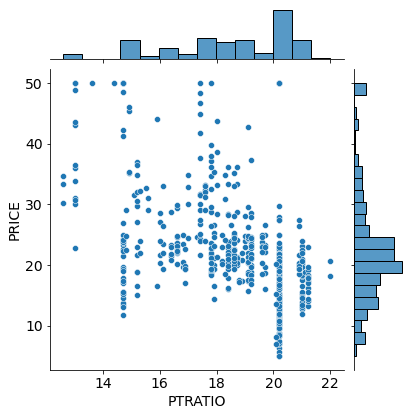

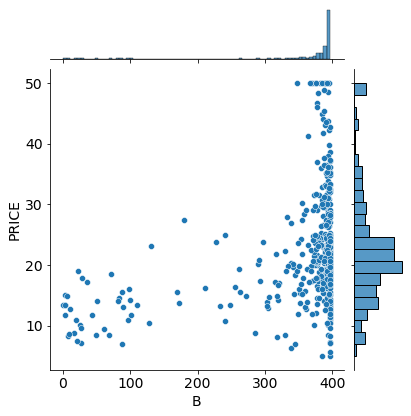

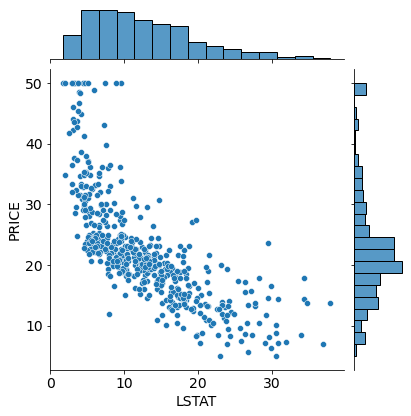

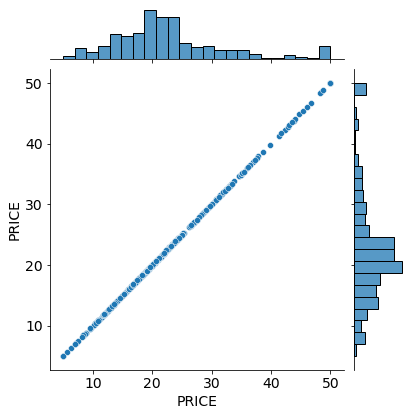

In [38]:
for feat in (features):
  sns.jointplot(x=feat, y="PRICE", data=df)


### **Вывод**

1. Слишком много выбросов
2. Нормальное распределение наблюдается только у RM

### **Изучение работы инструментов нормализации данных:**

Применение трансформера sklearn.preprocessing.StandardScaler к данным, отображение распределения после обработки, обучение модели на обработанных данных и оценка показателей

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
# 70% - для обучения, 30% - для тестов
TRAIN_RATIO = 0.7

# X - DataFrame только с признаками (для примера берем все признаки)
X = df[feature_names]
# y - истинные значения (разметка)
y = df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(
    # Передаются наборы, которые будут разделены в соответсвии с параметрами
    X, y, 
    # Задается размер обучающей выборки
    train_size=TRAIN_RATIO, 
    # Фиксируется состояние генератора случайных чисел 
    #   для сохранения повторяемости
    random_state=RANDOM_STATE
)

# Отображение размеров выборок
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(354, 13) (354,)
(152, 13) (152,)


In [47]:
def show_linear_model_weights(model, feature_names=None):
    '''
    Отображение весов
    Аргументы:
        model - модель линейной регрессии
        feature_names - (опционально) если передано, отображение весов вместе с именами признаков
    '''
    print('\n----- Weights -----')
    weights = model.coef_
    bias = model.intercept_
    if feature_names is None:  
        print(f'Weights: {weights}')
    else:
        # Функция zip() делает из двух списков один список пар значений
        pairs = zip(feature_names, weights)
        for pair in pairs:
            print(f'{pair[0]} | {pair[1]}')

    print(f'Bias: {bias}')

In [50]:
def draw_predictions_plot(y_pred, y_true):
    plt.scatter(y_pred, y_true)
    line_pnts = np.linspace(np.amin(y_pred)-0.1, np.amax(y_pred)+0.1, 1000)
    plt.plot(line_pnts, line_pnts, 'k--', lw=2)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.grid()


In [57]:
def evaluate_regressor(reg, X, y, mode):
    y_pred = reg.predict(X)
    r2_score_value = r2_score(y, y_pred)
    rmse_score = np.sqrt(mean_squared_error(y, y_pred))
    mae_score = mean_absolute_error(y, y_pred)

    print(f'\n----- Evaluation for {mode} -----')
    print(f'  R2: {r2_score_value}')
    print(f'  RMSE: {rmse_score}')
    print(f'  MAE: {mae_score}')


----- Weights -----
CRIM | -1.108346015417754
ZN | 0.8084399775400835
INDUS | 0.3431346557047933
CHAS | 0.8138642573885838
NOX | -1.7980429490588932
RM | 2.9138579955497654
AGE | -0.2989391755039209
DIS | -2.9425114769806915
RAD | 2.094193030043761
TAX | -1.447067312811984
PTRATIO | -2.05232232408682
B | 1.0237518746405991
LSTAT | -3.8857900211493894
Bias: 23.01581920903955

----- Evaluation for train -----
  R2: 0.7434997532004697
  RMSE: 4.748208239685937
  MAE: 3.3568267821682065

----- Evaluation for test -----
  R2: 0.7112260057484932
  RMSE: 4.638689926172821
  MAE: 3.162709871457406


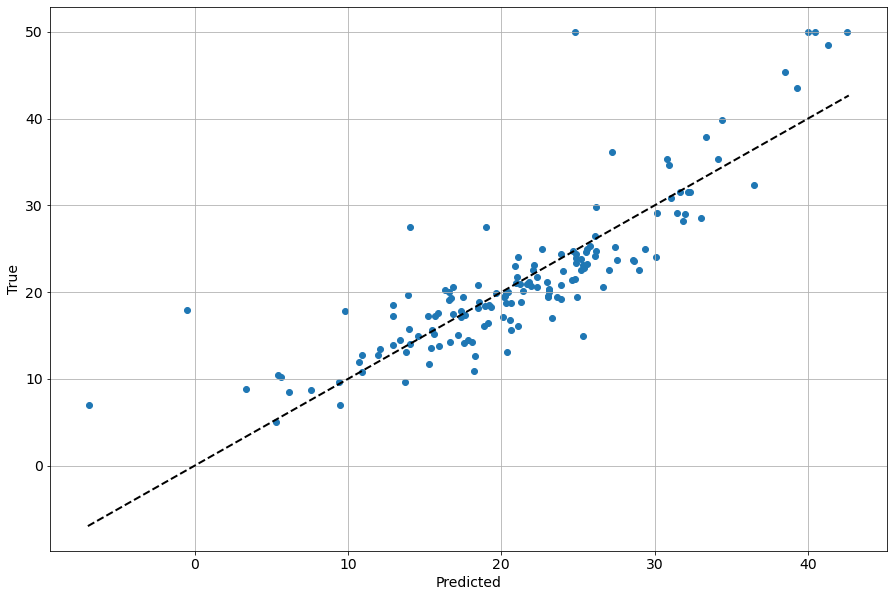

In [67]:
scaler = StandardScaler()
reg = LinearRegression()
scaler.fit(X_train)
X_traind_scaled = scaler.transform(X_train)
X_testd_scaled = scaler.transform(X_test)

reg.fit(X_traind_scaled,y_train)
show_linear_model_weights(reg, X_train.columns)
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')


Применение трансформера sklearn.preprocessing.MinMaxScaler к данным, отображение распределения после обработки, обучение модели на обработанных данных и оценка показателей


In [71]:
from sklearn.preprocessing import MinMaxScaler



----- Weights -----
CRIM | -11.874453326332448
ZN | 3.4018467913571957
INDUS | 1.3138357776880198
CHAS | 3.1198351162853952
NOX | -7.492691595119078
RM | 19.949248622000347
AGE | -1.0507030964564752
DIS | -15.24168408021582
RAD | 5.5827288159117545
TAX | -4.559970807607127
PTRATIO | -8.560440956236727
B | 4.677310480676527
LSTAT | -19.82738645674022
Bias: 26.028229324073685

----- Evaluation for train -----
  R2: 0.7434997532004697
  RMSE: 4.748208239685937
  MAE: 3.3568267821682047

----- Evaluation for test -----
  R2: 0.7112260057484927
  RMSE: 4.638689926172824
  MAE: 3.1627098714574067


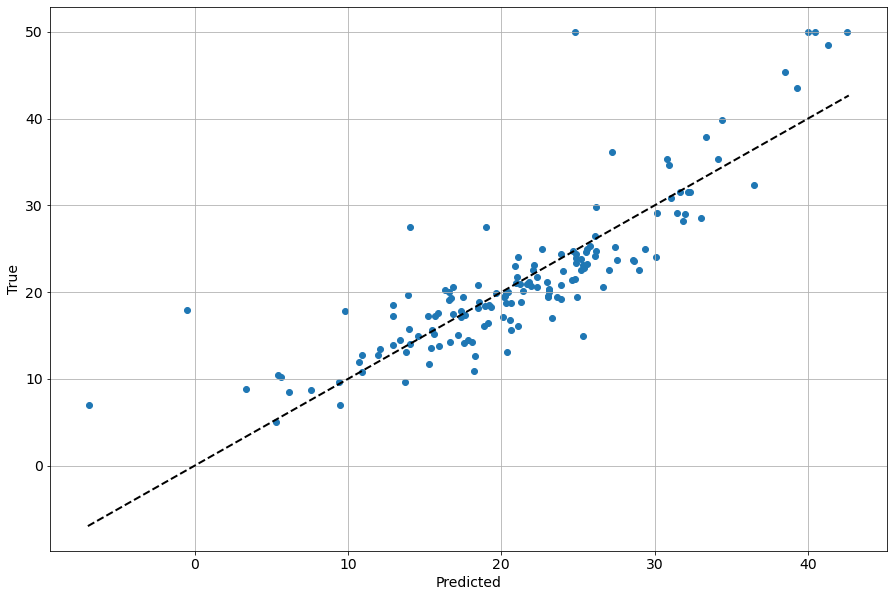

In [73]:
scaler = MinMaxScaler()
reg = LinearRegression()
scaler.fit(X_train)
X_traind_scaled = scaler.transform(X_train)
X_testd_scaled = scaler.transform(X_test)
reg.fit(X_traind_scaled,y_train)
show_linear_model_weights(reg, X_train.columns)
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')

## **Вывод**

1. При применении разных методов стандартизации, получаются различные весовые коэффициенты;
2. Оценки почти полностью совпадают
3. RMSE и MAE слишком быольшие,Ю надо уменьшить
4. R2 слишком далека от 1